In [1]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

In [2]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-evals")

# Placeholder for confusion matrix values
rtn_mses, rtn_ppls, rtn_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        rtn_mses.append(mse)
        rtn_ppls.append(ppl)
        rtn_bitwidhts.append(bitwidht)
        
rtn_mses = np.asarray(rtn_mses)
rtn_ppls = np.asarray(rtn_ppls)
rtn_bitwidhts = np.asarray(rtn_bitwidhts)

In [3]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/edenn-gptq")

# Placeholder for confusion matrix values
gptq_mses, gptq_ppls, gptq_bitwidhts = [], [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.summary.get("model")
    mse = run.summary.get("expected_mse")
    ppl = run.summary.get("wikitext2_PPL")
    bitwidht = run.summary.get("bitwidth")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name.split(",")[0].split("=")[1][1:-1] == MODEL:
        gptq_mses.append(mse)
        gptq_ppls.append(ppl)
        gptq_bitwidhts.append(bitwidht)
        
gptq_mses = np.asarray(gptq_mses)
gptq_ppls = np.asarray(gptq_ppls)
gptq_bitwidhts = np.asarray(gptq_bitwidhts)

In [4]:
import wandb
import numpy as np

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_GALQIWI")

# Placeholder for confusion matrix values
noisy_mses, noisy_ppls = [], []

# Iterate over runs and extract confusion matrix data
for run in project_runs:
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    
    # print(f"{model=} {mse=} {ppl=}")
    if mse is not None and ppl is not None and run.name == MODEL.split("/")[-1]:
        noisy_mses.append(float(mse))
        noisy_ppls.append(float(ppl))

noisy_mses = np.asarray(noisy_mses)
noisy_ppls = np.asarray(noisy_ppls)

Text(0.5, 1.0, 'meta-llama/Meta-Llama-3.1-8B')

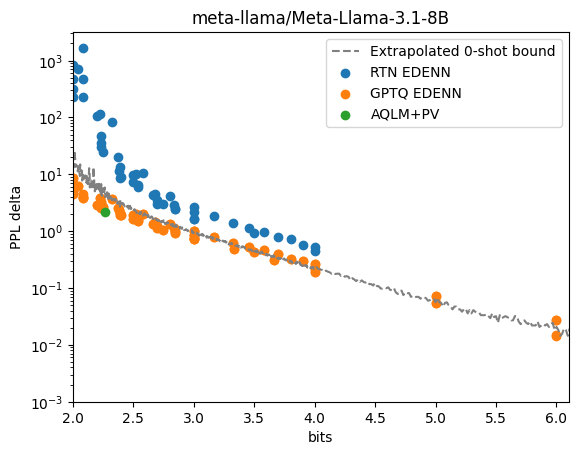

In [5]:
import matplotlib.pyplot as plt
import numpy as np


noisy_bitwidhts = - np.log2(noisy_mses) / 2
noisy_bitwidhts_order = np.argsort(noisy_bitwidhts)
plt.plot(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", linestyle="--", label="Extrapolated 0-shot bound",
)


plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    label="RTN EDENN",
)

plt.scatter(
    gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls),
    label="GPTQ EDENN",
)

if MODEL == "meta-llama/Meta-Llama-3.1-8B":
    plt.scatter(
        [2.27], [7.75 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
elif MODEL == "meta-llama/Llama-2-7b-hf":
    plt.scatter(
        [2.02, 2.29], [5.84 - np.min(rtn_ppls), 5.678532600402832 - np.min(rtn_ppls)],
        label="AQLM+PV",
    )
    plt.scatter(
        [2.02, 2.29, 3.04, 4.04], [6.688191890716553 - np.min(rtn_ppls), 5.922969818115234 - np.min(rtn_ppls), 5.46 - np.min(rtn_ppls), 5.21 - np.min(rtn_ppls)],
        label="AQLM",
    )
    plt.scatter(
        [2.00, 3.00, 4.00], [5.91 - np.min(rtn_ppls), 5.29 - np.min(rtn_ppls), 5.17 - np.min(rtn_ppls)],
        label="QTIP",
    )

plt.yscale("log")
plt.xlim(2, 6.1)
plt.ylim(10**-3, 10**3.5)

plt.xlabel("bits")
plt.ylabel("PPL delta")
plt.legend()
plt.title(MODEL)

In [6]:
print(np.min(rtn_ppls))

5.606886386871338


In [7]:
# MODEL = "meta-llama/Llama-2-7b-hf"
MODEL = "meta-llama/Meta-Llama-3.1-8B"

import wandb
import numpy as np
from tqdm.auto import tqdm

# Initialize W&B API client
api = wandb.Api()

# Fetch runs from your project
project_runs = api.runs("rock-and-roll/NOISY_MSE_ONE_LAYER_GALQIWI_PPL")

# Placeholder for confusion matrix values
mses, ppls, bitwidhts, block_ids = [], [], [], []

# Iterate over runs and extract confusion matrix data
for run in tqdm(project_runs):
    # This is a placeholder; you'll need to adjust it based on how you've logged your data
    model = run.config.get("base_model")
    mse = run.summary.get("relative_mse")
    ppl = run.summary.get("wikitext2")
    bitwidht = run.summary.get("effective_wbits")
    block_id = run.config.get("layer_idx")
    
    # print(f"{model=} {block_id=} {mse=} {ppl=}")
    if mse is not None and ppl is not None:
        mses.append(mse)
        ppls.append(ppl)
        bitwidhts.append(bitwidht)
        block_ids.append(block_id)
        
mses = np.asarray(mses)
ppls = np.asarray(ppls)
bitwidhts = np.asarray(bitwidhts)
block_ids = np.asarray(block_ids)

order = np.argsort(mses)
mses = mses[order]
ppls = ppls[order]
bitwidhts = bitwidhts[order]
block_ids = block_ids[order]

  0%|          | 0/9305 [00:00<?, ?it/s]

Text(0, 0.5, 'PPL')

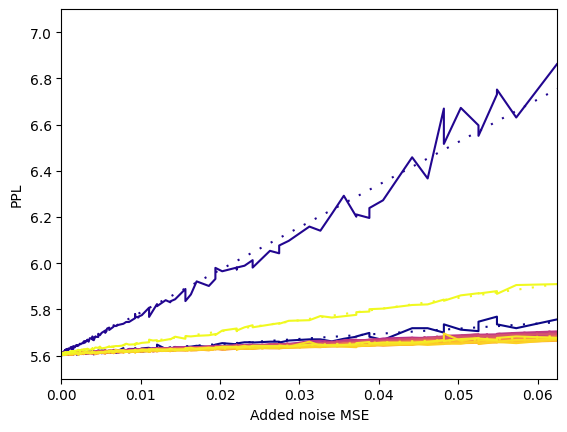

In [8]:
from scipy.stats import linregress

import matplotlib.pyplot as plt
import matplotlib as mpl

slopes = np.empty((32,))

cmap = mpl.colormaps["plasma"]

for block_id in range(32):
    this_layer_pos = (block_ids == block_id)
    
    plt.plot(
        mses[this_layer_pos],
        ppls[this_layer_pos],
        label=f"{block_id}",
        color=cmap(block_id/31),
    )
    
    this_layer_pos = (block_ids == block_id) & (mses <= 4**(-2))
    fit = linregress(mses[this_layer_pos], ppls[this_layer_pos])
    
    plt.plot(
        np.linspace(0, 4**(-2)),
        fit.intercept + fit.slope * np.linspace(0, 4**(-2)),
        color=cmap(block_id/31),
        linestyle=(0, (1, 5)),
    )
    slopes[block_id] = fit.slope

    # plt.yscale("log")

plt.xlim(0, 4**(-2))
plt.ylim(5.5, 7.1)

plt.xlabel("Added noise MSE")
plt.ylabel("PPL")

Text(0.5, 1.0, 'Optimal block-wise BPW, meta-llama/Meta-Llama-3.1-8B')

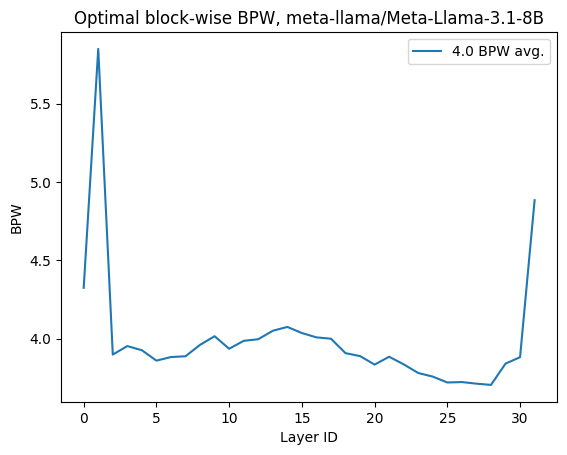

In [9]:
from scipy.optimize import minimize


def get_optimal_blockwise_bitwidths(slopes, budget):
    bitwidhts = np.log2(slopes) / 2
    return bitwidhts - bitwidhts.mean() + budget


def expected_ppl_gap(slopes, allocated_bitwidths):
    return np.sum(slopes * np.power(4, -allocated_bitwidths))

for budget in (4.0,):
    plt.plot(get_optimal_blockwise_bitwidths(slopes, budget), label=f"{budget} BPW avg.")
    
plt.xlabel("Layer ID")
plt.ylabel("BPW")

plt.legend()
plt.title(f"Optimal block-wise BPW, {MODEL}")

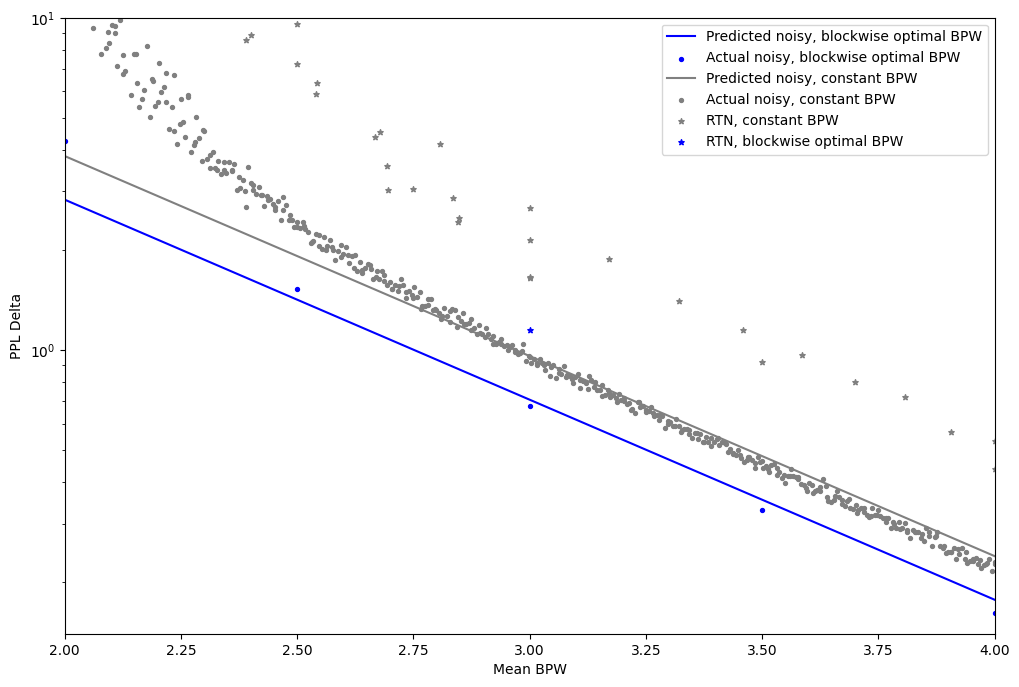

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]

bpws = [2, 2.5, 3, 3.5, 4.0]
actual = [9.854679107666016, 7.133002281188965, 6.286427021026611, 5.935948848724365, 5.768750190734863]
rtn = [None, None, 6.754897594451904, None, None]

# NOISE BLOCKWISE BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in np.linspace(2, 4)],
    color="blue", label="Predicted noisy, blockwise optimal BPW",
)
plt.scatter(bpws, actual  - np.min(rtn_ppls), s=8, color="blue", label="Actual noisy, blockwise optimal BPW")


# NISE CONSTANT BPW
plt.plot(
    np.linspace(2, 4),
    [expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in np.linspace(2, 4)],
    color="gray", label="Predicted noisy, constant BPW",
)
plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls),
    color="gray", s=8, label="Actual noisy, constant BPW",
)

# GPTQ
# plt.scatter(
#     gptq_bitwidhts, gptq_ppls - np.min(rtn_ppls), 
#     color="green", marker="*", s=16, label="GPTQ, constant BPW",
# )

# RTN CONSTANT BPW
plt.scatter(
    rtn_bitwidhts, rtn_ppls - np.min(rtn_ppls),
    color="gray", s=16, marker="*", label="RTN, constant BPW",
)

# RTN OPTIMAL BPW
plt.scatter(
    [3.0], 6.754897594451904 - np.min(rtn_ppls),
    color="blue", s=16, marker="*", label="RTN, blockwise optimal BPW",
)

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.yscale("log")
plt.xlim(2, 4)
plt.ylim(0.14, 10)

plt.legend()

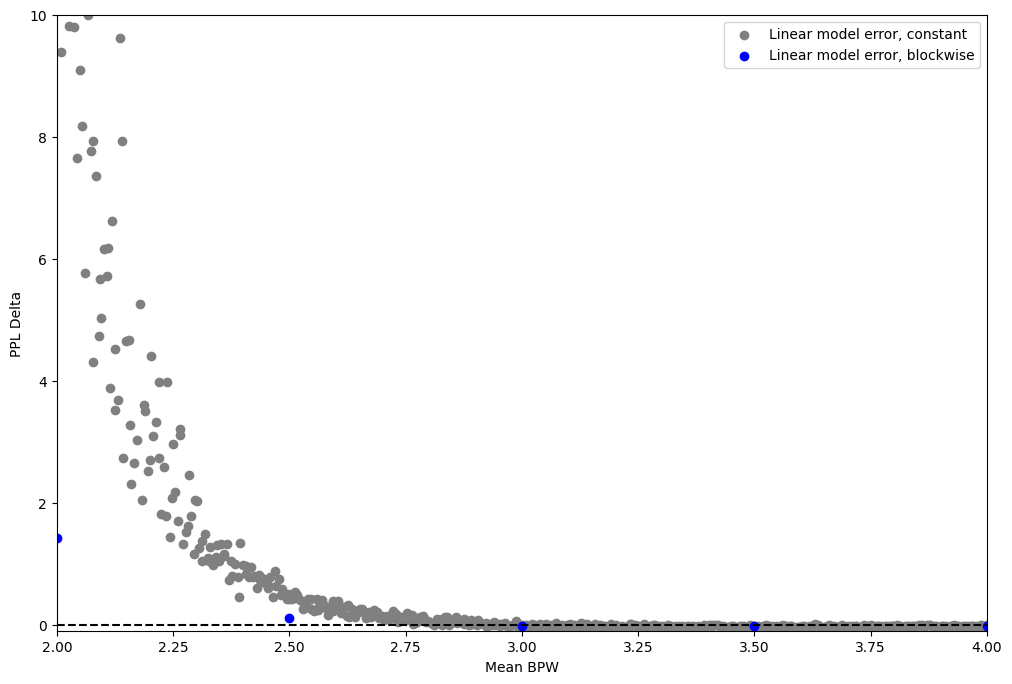

In [11]:
linear_model_constant_ppls = np.asarray([expected_ppl_gap(slopes, np.array([bpw for _ in range(32)])) for bpw in noisy_bitwidhts[noisy_bitwidhts_order]])

plt.scatter(
    noisy_bitwidhts[noisy_bitwidhts_order], (noisy_ppls[noisy_bitwidhts_order] - np.min(rtn_ppls)) - linear_model_constant_ppls,
    color="gray", label="Linear model error, constant",
)
plt.scatter(
    bpws, (actual - np.min(rtn_ppls)) - np.asarray([expected_ppl_gap(slopes, get_optimal_blockwise_bitwidths(slopes, bpw)) for bpw in bpws]),
    color="blue", label="Linear model error, blockwise",
)
plt.axhline(0, color="black", linestyle="--")

plt.xlabel("Mean BPW")
plt.ylabel("PPL Delta")

plt.xlim(2, 4)
plt.ylim(-0.1, 10)

plt.legend()

In [12]:
import math
from os import listdir
from os.path import isfile, join

for i in range(16):
    assert int(math.log2(2**i)) == i

grids_path = "../grids"
grids = [f for f in listdir(grids_path) if isfile(join(grids_path, f))]

good_grids = []

for grid in sorted(grids):
    grid_signature = grid[4:-3].split("-")
    edenn_d = int(grid_signature[0])
    edenn_n = int(grid_signature[1])
    
    print(f"{edenn_d} {edenn_n}:", end=" ")
    if edenn_n & (edenn_n-1) != 0:
        # print(f"not power of 2")
        continue

    if int(math.log2(edenn_n)) not in (1, 2, 4, 8, 6, 10, 12) :
        # print(f"not packable")
        continue
    
    if edenn_n * edenn_d * 2 > 64 * 1024:
        # print(f"too large")
        continue
    
    good_grids.append((edenn_d, edenn_n))

1 10: 1 11: 1 12: 1 13: 1 14: 1 15: 1 16: 1 2: 1 3: 1 32: 1 4: 1 5: 1 6: 1 64: 1 7: 1 8: 1 9: 10 1142: 10 137: 10 16: 10 2: 10 3290: 10 396: 10 47: 10 5: 2 1024: 2 11: 2 128: 2 14: 2 16: 2 17: 2 2: 2 22: 2 256: 2 27: 2 3: 2 32: 2 33: 2 4: 2 4096: 2 41: 2 5: 2 51: 2 6: 2 64: 2 7: 2 8: 2 9: 3 1024: 3 104: 3 11: 3 143: 3 15: 3 16: 3 197: 3 2: 3 2048: 3 21: 3 256: 3 271: 3 29: 3 3: 3 32: 3 372: 3 4: 3 40: 3 4096: 3 512: 3 55: 3 6: 3 64: 3 76: 3 8: 4 10: 4 1024: 4 1150: 4 138: 4 16: 4 1757: 4 2: 4 2048: 4 211: 4 25: 4 256: 4 2682: 4 3: 4 32: 4 323: 4 38: 4 4: 4 4096: 4 493: 4 512: 4 59: 4 64: 4 7: 4 753: 4 8: 4 90: 5 1024: 5 11: 5 1371: 5 16: 5 165: 5 19: 5 2: 5 2048: 5 2326: 5 256: 5 280: 5 32: 5 33: 5 3949: 5 4: 5 4096: 5 475: 5 512: 5 57: 5 6: 5 64: 5 8: 5 807: 5 97: 6 10: 6 1024: 6 128: 6 16: 6 1633: 6 19: 6 2: 6 2048: 6 243: 6 256: 6 3081: 6 32: 6 36: 6 4: 6 4096: 6 458: 6 5: 6 512: 6 64: 6 68: 6 8: 6 865: 7 1274: 7 138: 7 14: 7 2672: 7 289: 7 3: 7 31: 7 607: 7 65: 7 7: 8 1024: 8 119: 

In [13]:
%env CUDA_VISIBLE_DEVICES=7

import torch
from edenn import edenn

@torch.no_grad()
def eval_grid(edenn_d: int, edenn_n: int):
    x = torch.empty((2**16, edenn_d), device="cuda").normal_()
    dequant, entropy = edenn(x, edenn_d, edenn_n)
    mse = (x - dequant).pow(2).mean().item()
    return mse, entropy / edenn_d

good_grids_with_mse = []
for (edenn_d, edenn_n) in good_grids:
    mse, entropy = eval_grid(edenn_d, edenn_n)
    good_grids_with_mse.append(
        {"edenn_d": edenn_d, "edenn_n": edenn_n, "mse": mse, "bits": math.log2(edenn_n) / edenn_d, "entropy": entropy}
    )

good_grids_with_mse

env: CUDA_VISIBLE_DEVICES=7


[{'edenn_d': 1,
  'edenn_n': 16,
  'mse': 0.00972139835357666,
  'bits': 4.0,
  'entropy': 3.7610511779785156},
 {'edenn_d': 1,
  'edenn_n': 2,
  'mse': 0.3584073483943939,
  'bits': 1.0,
  'entropy': 0.9999998211860657},
 {'edenn_d': 1,
  'edenn_n': 4,
  'mse': 0.11766372621059418,
  'bits': 2.0,
  'entropy': 1.90839684009552},
 {'edenn_d': 1,
  'edenn_n': 64,
  'mse': 0.0011298938188701868,
  'bits': 6.0,
  'entropy': 5.918142318725586},
 {'edenn_d': 10,
  'edenn_n': 16,
  'mse': 0.6815171837806702,
  'bits': 0.4,
  'entropy': 0.3999025821685791},
 {'edenn_d': 10,
  'edenn_n': 2,
  'mse': 0.9360763430595398,
  'bits': 0.1,
  'entropy': 0.09999949336051941},
 {'edenn_d': 2,
  'edenn_n': 1024,
  'mse': 0.002041247207671404,
  'bits': 5.0,
  'entropy': 4.9204511642456055},
 {'edenn_d': 2,
  'edenn_n': 16,
  'mse': 0.10868831723928452,
  'bits': 2.0,
  'entropy': 1.9429984092712402},
 {'edenn_d': 2,
  'edenn_n': 2,
  'mse': 0.6811574101448059,
  'bits': 0.5,
  'entropy': 0.49999234080314

Text(0, 0.5, 'MSE')

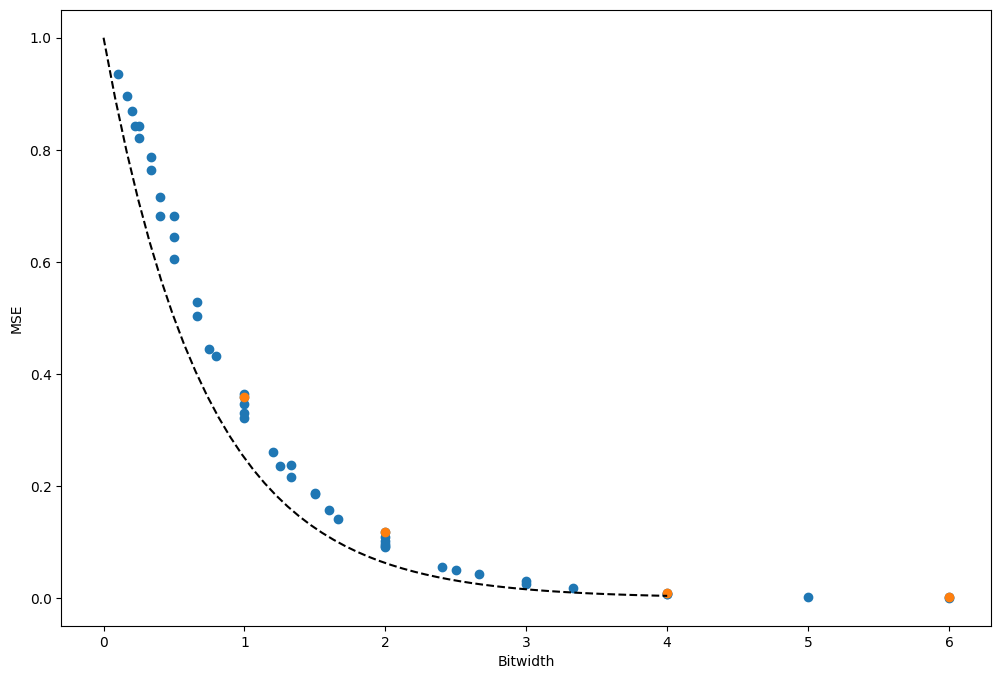

In [70]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter([v["bits"] for v in good_grids_with_mse], [v["mse"] for v in good_grids_with_mse], label="Good HIGGS grids")
plt.scatter([v["bits"] for v in good_grids_with_mse if v["edenn_d"] == 1], [v["mse"] for v in good_grids_with_mse if v["edenn_d"] == 1], label="Good EDENN grids")
plt.plot(np.linspace(0, 4), np.power(4, -np.linspace(0, 4)), linestyle="--", color="black")

plt.xlabel("Bitwidth")
plt.ylabel("MSE")

In [81]:
from ortools.linear_solver import pywraplp

def find_grids_with_budget(
    slopes,    # linear coefficients for [layerwise mse -> metric]
    weights,   # linear coefficients for [layer bitwidth -> total bitwidth] (1 / num_blocks for blockwise)
    budget,    # upper bound on total bitwidth
    grid_bits, # available grid bitwidths
    grid_mses  # available grid mses
) -> tuple[float, list]:
    num_layers = len(slopes)
    num_grids = len(grid_bits)
    assert len(grid_mses) == num_grids
    
    solver = pywraplp.Solver.CreateSolver("CP-SAT")

    x = {(j, i) : solver.BoolVar("name") for i in range(num_grids) for j in range(num_layers)}
    
    for j in range(num_layers) : solver.Add(sum(x[(j, i)] for i in range(num_grids)) == 1)
    solver.Add(sum(x[(j, i)] * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids)) <= budget)
    solver.Minimize(sum(x[(j, i)] * slopes[j] * grid_mses[i] for j in range(num_layers) for i in range(num_grids)))

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        avg_bits = sum(x[(j, i)].solution_value() * weights[j] * grid_bits[i] for j in range(num_layers) for i in range(num_grids))
        solution = np.asarray([[x[(j, i)].solution_value() for i in range(num_grids)] for j in range(num_layers)])
        indices = np.argwhere(solution == 1.0)
        assert len(indices) == num_layers
        return avg_bits, indices[:,1]
    else:
        raise Exception("Didn't solve")

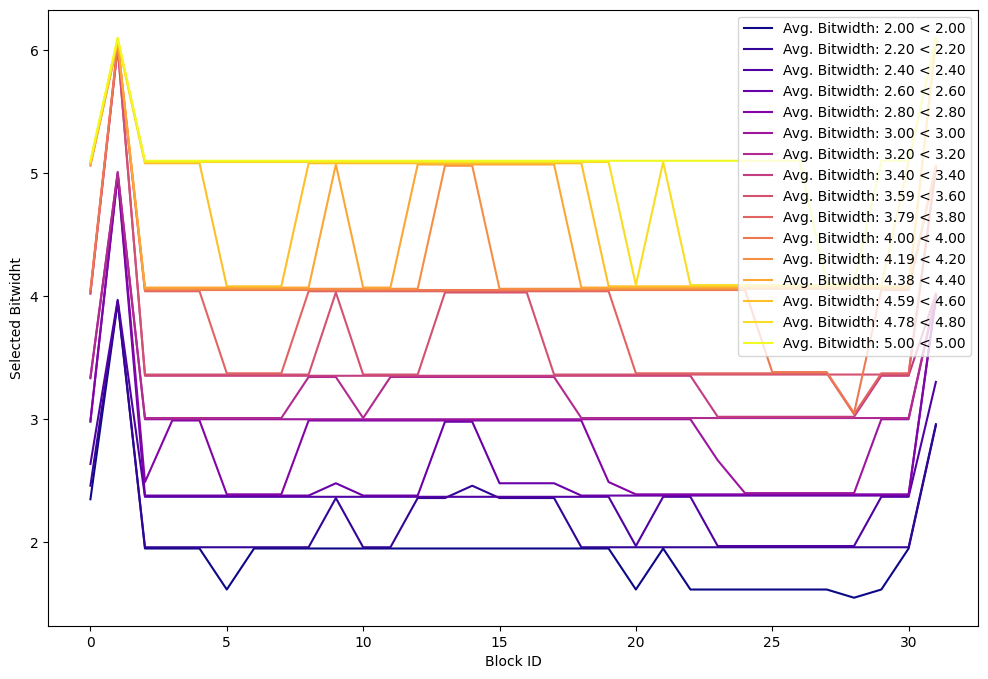

In [83]:
cmap = mpl.colormaps["plasma"]

for target_bitwidht in tqdm([2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0], desc="Processing bitwidths..."):
    girds_to_map_to = good_grids_with_mse
    # girds_to_map_to = [grid for grid in good_grids_with_mse if grid["edenn_d"] == 1]
    
    
    avg_bits, indices = find_grids_with_budget(slopes, np.ones((32,)) / 32, target_bitwidht, [grid["bits"] for grid in girds_to_map_to], [grid["mse"] for grid in girds_to_map_to])
    plt.plot(
        np.array([girds_to_map_to[i]["bits"] for i in indices]) + 0.05 * (target_bitwidht - 3.0),
        color=cmap((target_bitwidht -  2) / (5 - 2)),
        label=f"Avg. Bitwidth: {avg_bits:.2f} < {target_bitwidht:.2f}"
    )
    
plt.xlabel("Block ID")
plt.ylabel("Selected Bitwidht")
plt.legend(loc="upper right")